# Notebook to plot power spectra and CF for the halos and cdm

## Loading packages

In [255]:
import numpy as np
# import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14
from collections import defaultdict

import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import InterpolatedUnivariateSpline


## Nested dictionary

In [39]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
data = nested_dict(5, list)
pow_gev = nested_dict(3, list)

## Loading power and CF data

In [46]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"
directory_halo = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD_Halos/"
directory_power = "/Users/farbod/Dropbox/Projects/Doppler_RSD//Data/kevolution_gevolution_power_output/"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];

redshifts = ["0", "0.5", "1", "2", "3"];
files_list = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];

for j in range(5):
    for i in range(5):
        data['cdm']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/no_RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cdm']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cdm']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/no_RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cdm']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        
        data['halo']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        
        
#gevolution powerspectra

pow_gev['gev_em0']['z=0']=np.loadtxt(directory_power+files[1]+"/output/w0d9_cs1_gevolution_pk016_deltacdm.dat");
pow_gev['gev_em7']['z=0']=np.loadtxt(directory_power+files[2]+"/output/w0d9_cs2_em7_gevolution_pk016_deltacdm.dat");
pow_gev['kev_em4']['z=0']=np.loadtxt(directory_power+files[3]+"/output/kess_cs2e4_4032box_4608_pk014_deltacdm.dat");
pow_gev['kev_em7']['z=0']=np.loadtxt(directory_power+files[4]+"/output/kess_cs2e7_4032box_4608_pk014_deltacdm.dat");


# Power test, Pylians test

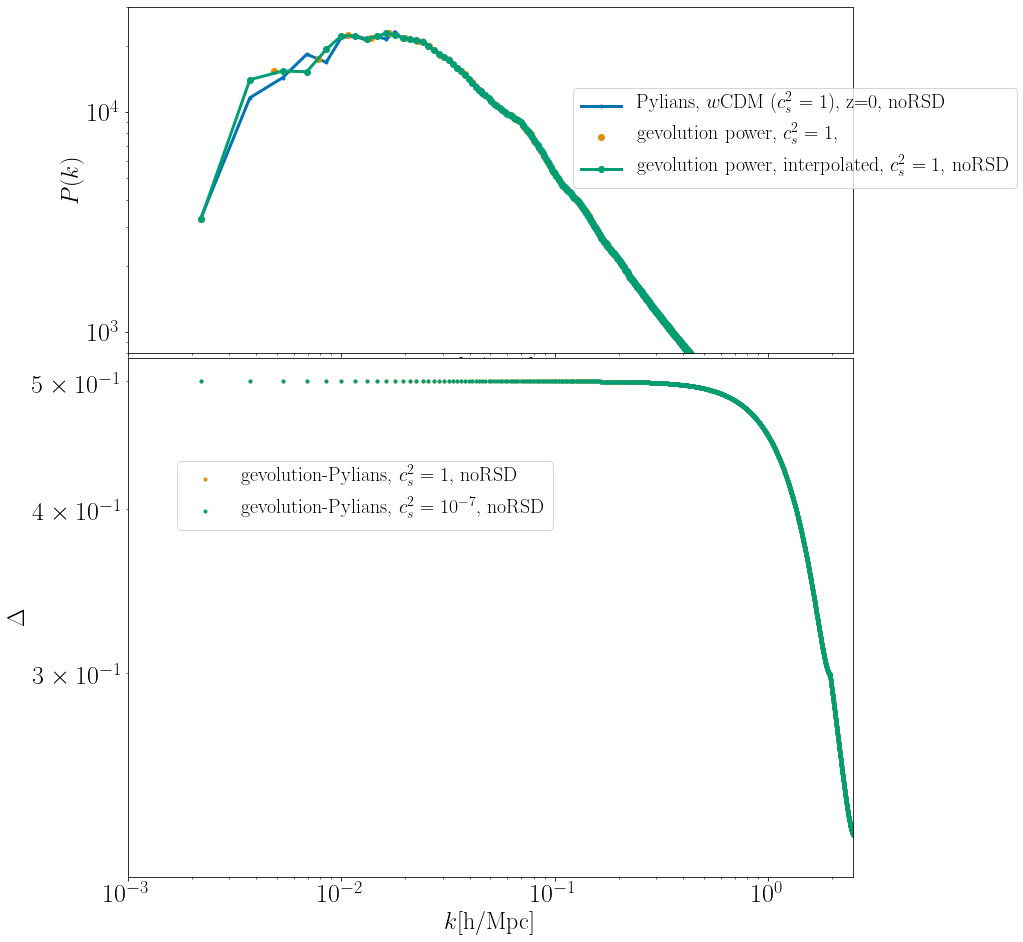

In [159]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)

kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($c_s^2=1$), ","$w$CDM-gev ($c_s^2=10^{-7}$), ",
          "$w$CDM ($c_s^2=10^{-4}$), ","$w$CDM ($c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [1]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".-",color =Colors[l], lw=3,label="Pylians, "+decrip[i]+z[j]+", "+RSD)
        l=l+1

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
# interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=5)
# pk = interp_pow(k_pylians);
# k_w =k_pylians
axs[0].loglog(k_w,pk*(2.*np.pi**2)/(k_w**3),"o",color =Colors[l], lw=3,label="gevolution power, $c_s^2=1$, ")

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=2)
pk = interp_pow(k_pylians);
k_w =k_pylians
axs[0].loglog(k_w,pk*(2.*np.pi**2)/(k_w**3),"-o",color =Colors[l+1], lw=3,label="gevolution power, interpolated, $c_s^2=1$, "+RSD)

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_ylim(8.e2,3.e4)
axs[0].set_xlim(1.e-3,1)
axs[0].legend(fontsize=20,bbox_to_anchor=(0.6,0.45))

# Rel diff
kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($c_s^2=1$), ","$w$CDM-gev ($c_s^2=10^{-7}$), ",
          "$w$CDM ($c_s^2=10^{-4}$), ","$w$CDM ($c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

k_pylians =data[kind][RSD][file[0]]['pow'][z[0]][0,:] 
k_w = pow_gev['gev_em0']['z=0'][:,0];
pk = pow_gev['gev_em0']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=2)
pk_gev = interp_pow(k_pylians);
pk_pylians = data[kind][RSD][file[1]]['pow'][z[0]][1,:]
axs[1].plot(k_pylians,np.abs(pk_gev-pk_pylians)/(2.0*(pk_pylians+pk_gev)),".",color =Colors[l], lw=3,label="gevolution-Pylians, $c_s^2=1$, "+RSD)


k_pylians =data[kind][RSD][file[4]]['pow'][z[0]][0,:] 
k_w = pow_gev['kev_em7']['z=0'][:,0];
pk = pow_gev['kev_em7']['z=0'][:,1];
interp_pow=InterpolatedUnivariateSpline(k_w,pk,k=2)
pk_gev = interp_pow(k_pylians);
pk_pylians = data[kind][RSD][file[4]]['pow'][z[0]][1,:]
axs[1].plot(k_pylians,np.abs(pk_gev-pk_pylians)/(2.0*(pk_pylians+pk_gev)),".",color =Colors[l+1], lw=3,label="gevolution-Pylians, $c_s^2=10^{-7}$, "+RSD)



axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(-0.2,0.3)
axs[1].set_xlim(1.e-3,2.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=(0.6,0.82))
# X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)

# cdm Powerspectra comparison, no RSD

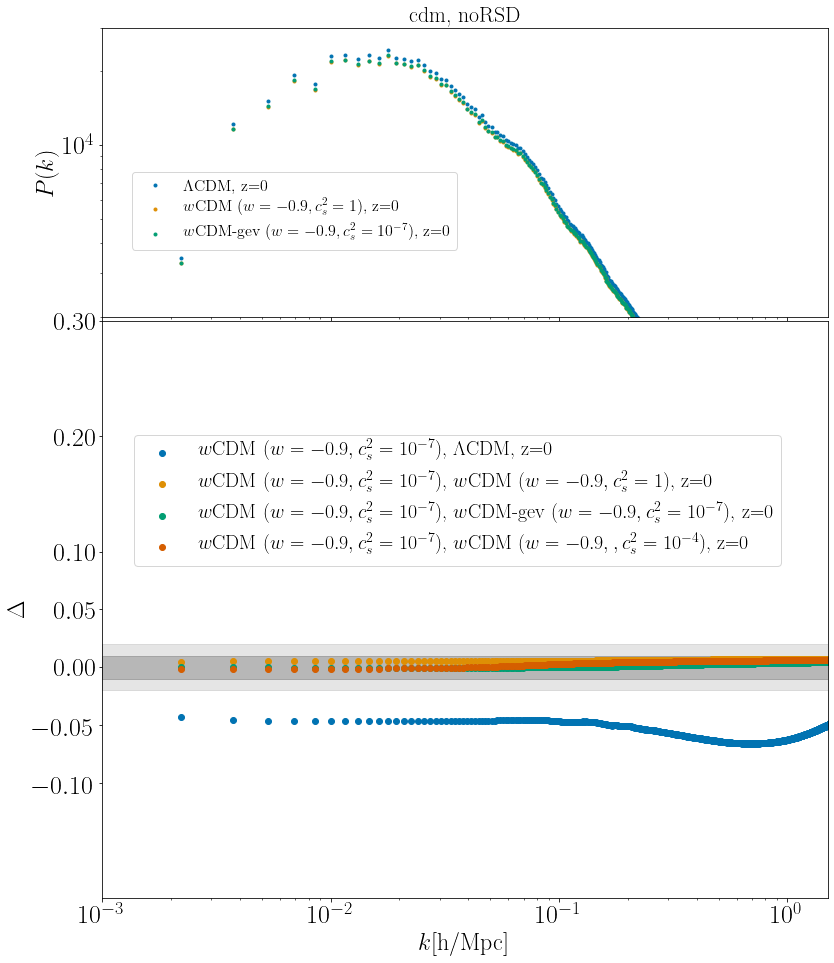

In [187]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,3.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.2,0.3)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=(0.95,0.82))
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo Powerspectra comparison,  no RSD

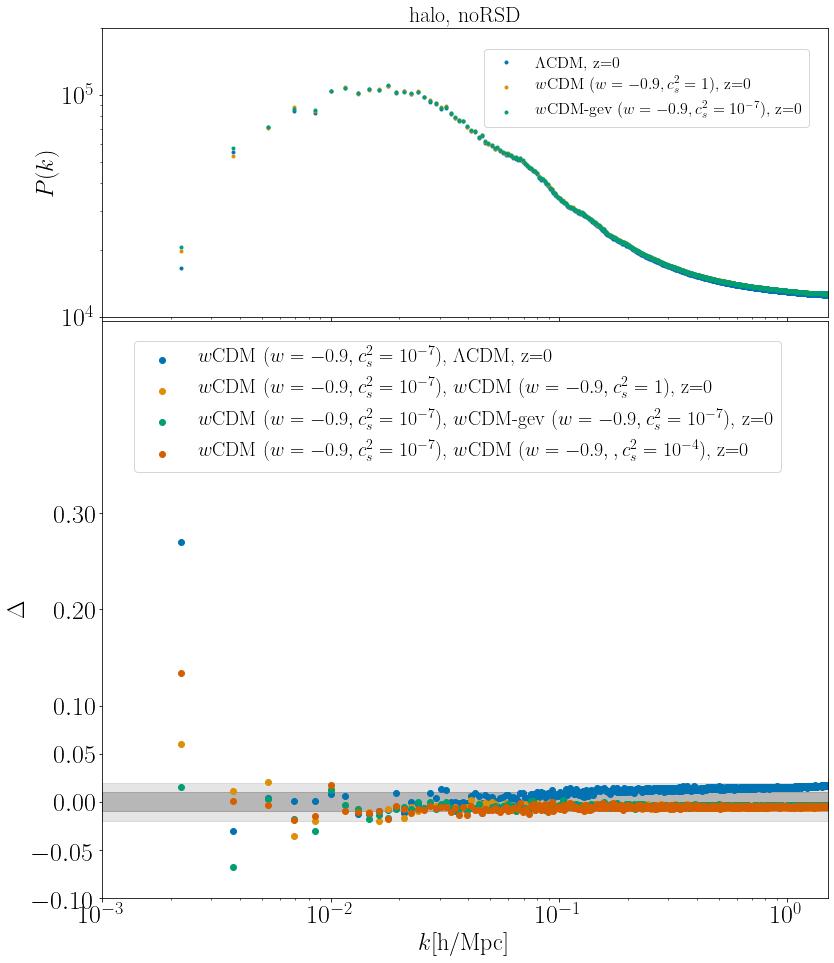

In [185]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e4,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=16,bbox_to_anchor=(0.75,0.63))
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.5)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=(0.95,0.72))
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# cdm Powerspectra comparison,  RSD

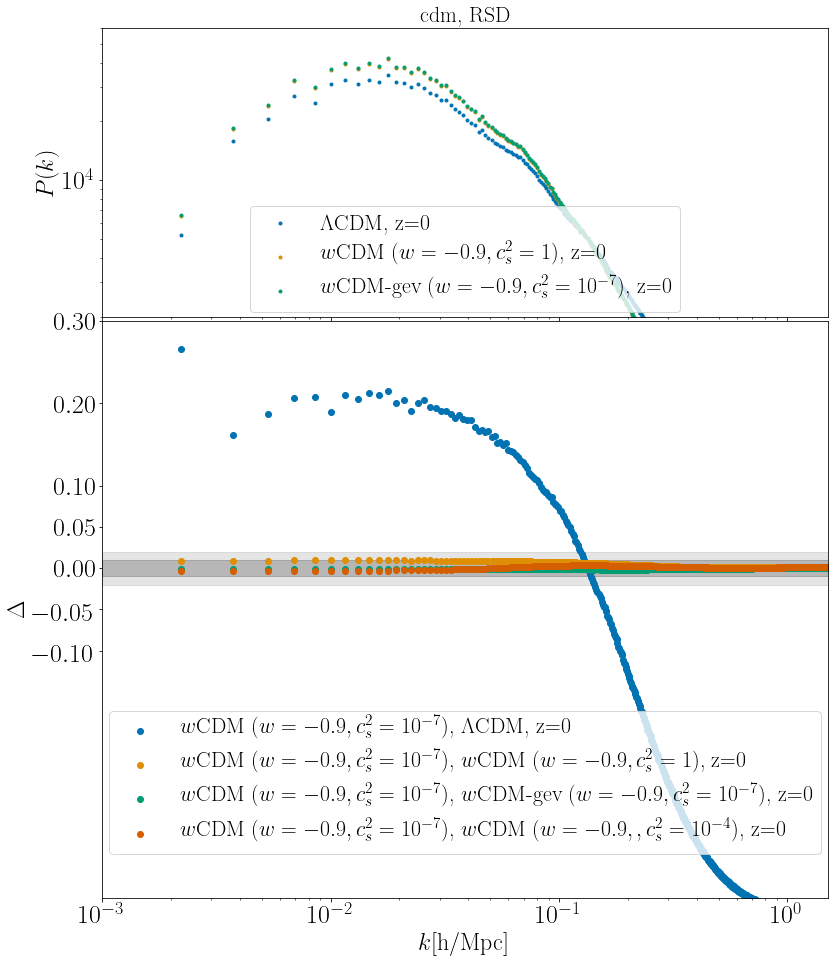

In [213]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,6.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.4,0.3)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# cdm power RSD and no-RSD

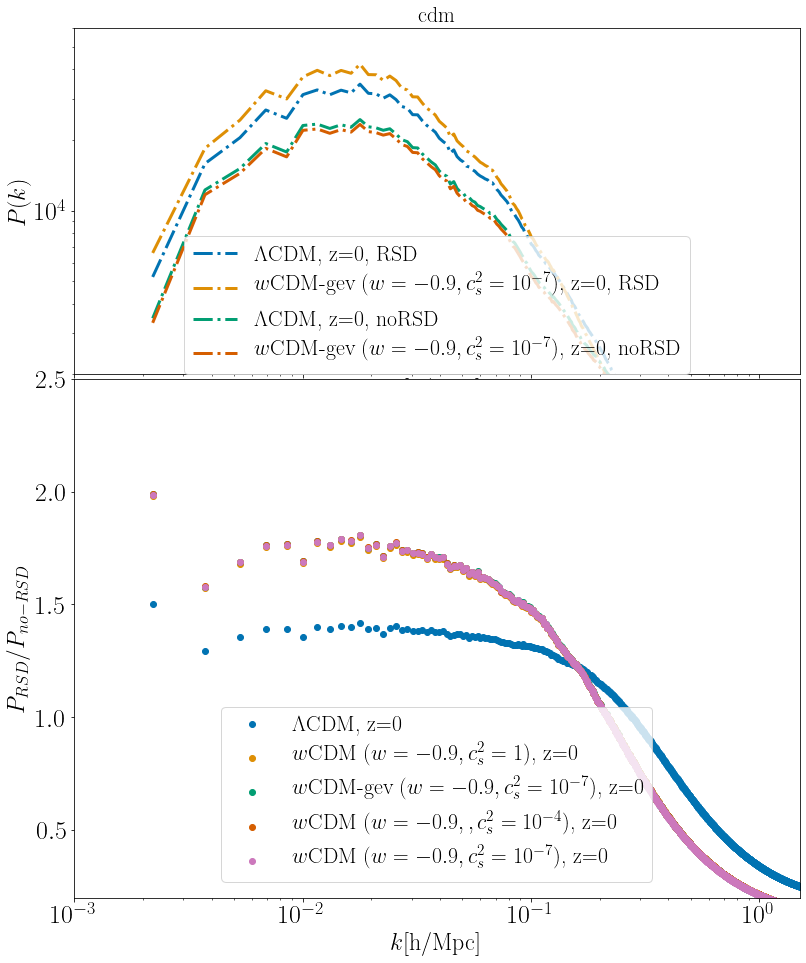

In [240]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

kind = 'cdm'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(2.e3,6.e4)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,2.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo Powerspectra comparison,  RSD

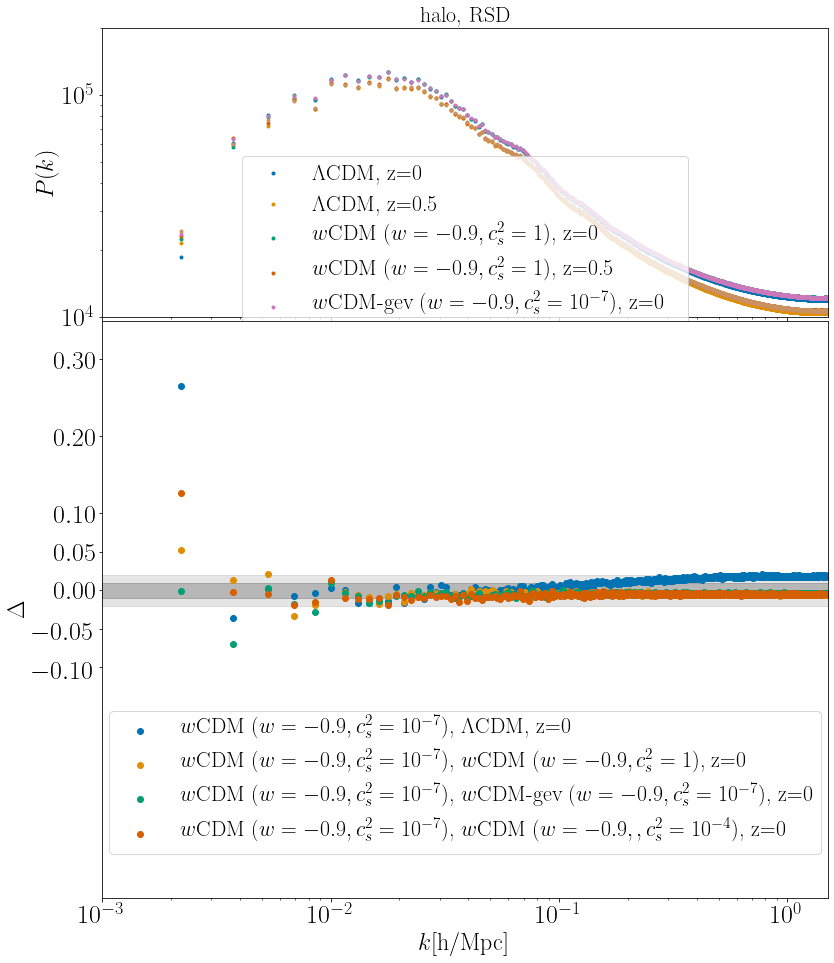

In [273]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0,1]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e4,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
                [k2,pk2]=data[kind][RSD][file[num2]]['pow'][z[j]][[0,1],:]
                axs[1].plot(k1,(pk2-pk1)/pk1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.4,0.35)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo power RSD and no-RSD

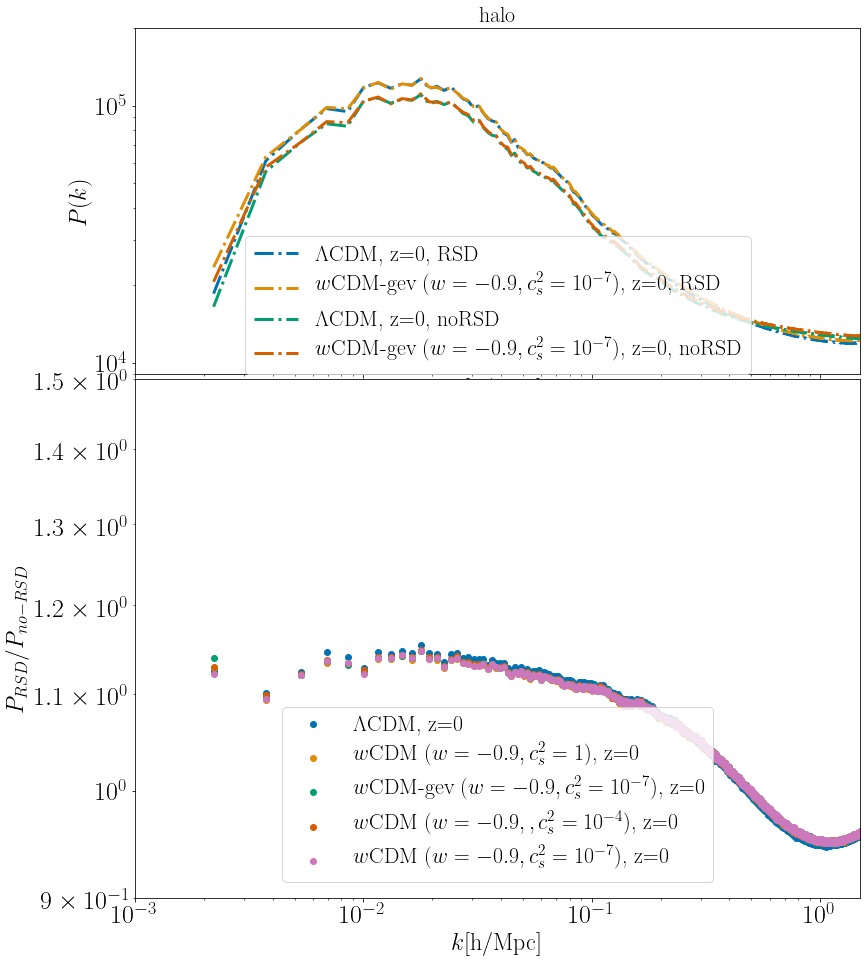

In [239]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,1.5]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

for i in [0,2]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
        l=l+1

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(9.e3,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
axs[1].set_ylim(0.9,1.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo vs cdm, RSD and noRSD

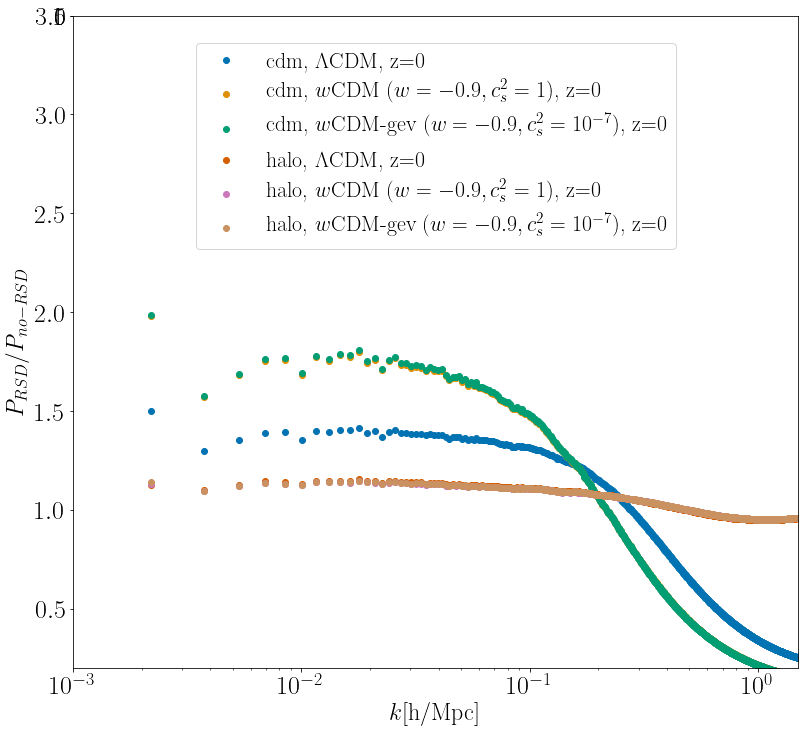

In [253]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
# for i in [0,2]: # file
#     for j in [0]: # Redshifts
#         [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
#         axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
#         l=l+1

# RSD ='noRSD'
# file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
# decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
#           "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
# z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

# for i in [0,2]: # file
#     for j in [0]: # Redshifts
#         [k_w,pk]=data[kind][RSD][file[i]]['pow'][z[j]][[0,1],:]  
#         axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", "+RSD)
#         l=l+1

# axs[0].set_ylabel('$P(k)$',fontsize=24)
# axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# # plt.yscale('log')
# # axs[0].xticks(size = 25);
# # axs[0].yticks(size = 25);
# axs[0].set_ylim(9.e3,2.e5)
# axs[0].set_xlim(1.e-3,2.e0)
# axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
# axs[0].set_title(kind, fontsize=22)
# # Relative difference:

kind = "cdm"
l=0
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo vs cdm, RSD and noRSD redshift evolution

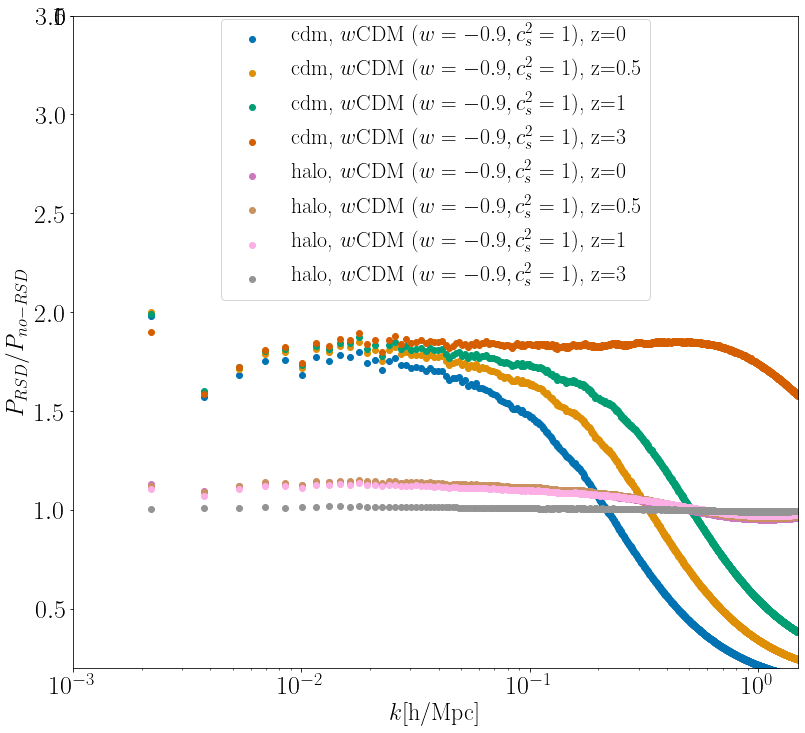

In [261]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


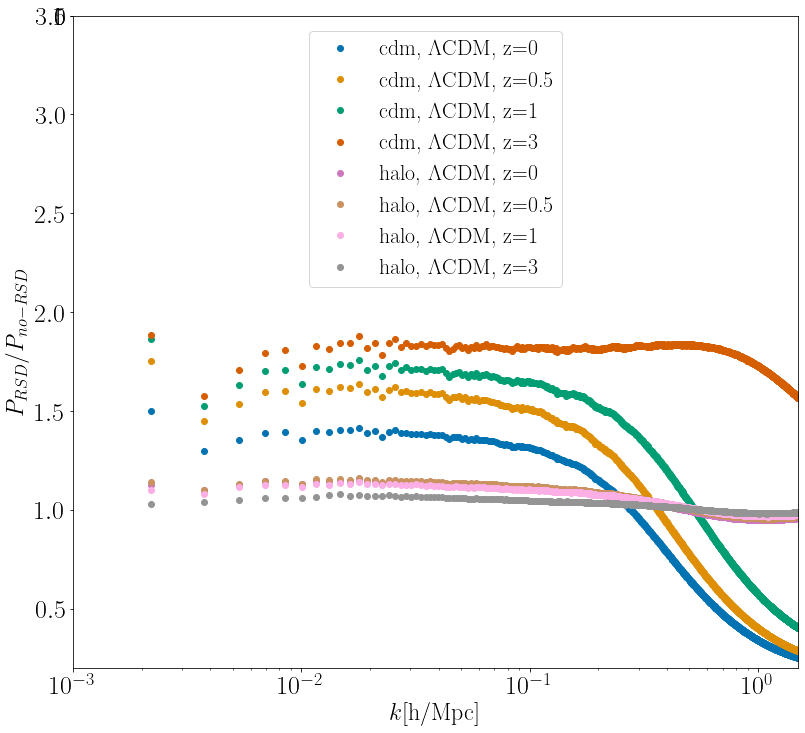

In [264]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo over cdm power spectrum

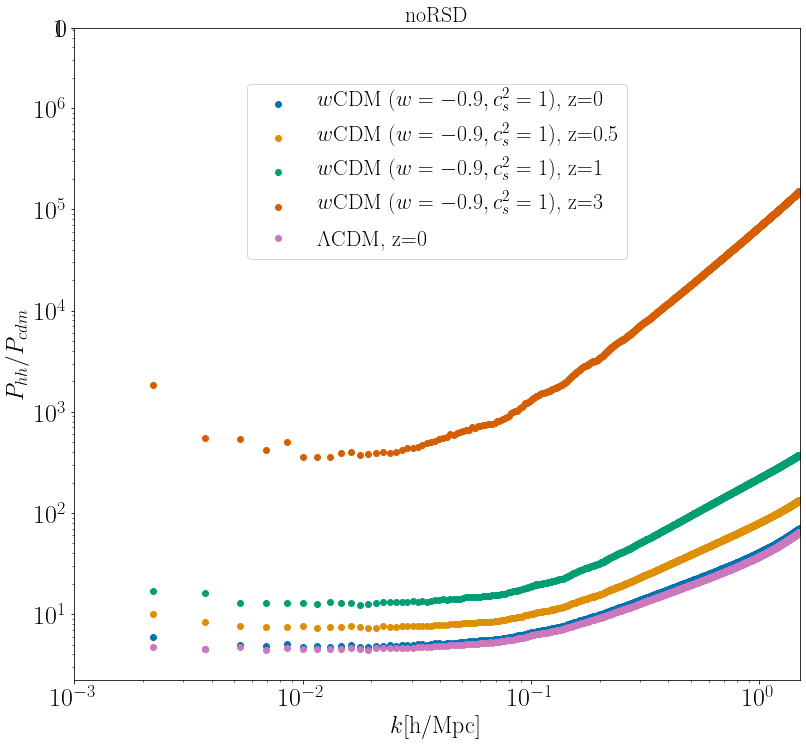

In [271]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$P_{hh}/P_{cdm}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
